<a href="https://colab.research.google.com/github/Tharun173/CSE22173-ML-LAB/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('/content/Lab Session Data(Purchase data).csv')

# Display the columns before removal
print("Columns before removal:", data.columns)

# Drop the 'Customer' column and the unnamed columns that contain no data
data.drop(columns=['Customer', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
                   'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
                   'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                   'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], inplace=True)

# Fill missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify the columns after processing
print("Columns after processing:", data_imputed.columns)

# Splitting the data into features and target variable
X = data_imputed.drop(columns=['Payment (Rs)'])  # Replace with the correct target column name
y = data_imputed['Payment (Rs)']  # Replace with the correct target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Classification Report
class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)

# Print results
print("Training Confusion Matrix:\n", conf_matrix_train)
print("Test Confusion Matrix:\n", conf_matrix_test)
print("Training Classification Report:\n", class_report_train)
print("Test Classification Report:\n", class_report_test)




Columns before removal: Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk'],
      dtype='object')
Columns after processing: Index(['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)',
       'Candy', 'Mango', 'Milk'],
      dtype='object')
Training Confusion Matrix:
 [[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]]
Test Confusion Matrix:
 [[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]]
Training Classification Report:
               precision    recall  f1-score   support

       110.0       1.00      1.00      1.00         1
       198.0       0.50      1.00      0.67         1
       271.0      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

IT IS REGULAR Fit

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Lab Session Data(Purchase data).csv')

# Drop unnecessary columns
data.drop(columns=['Customer', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
                   'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
                   'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                   'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], inplace=True)

# Splitting the data into features and target variable
X = data.drop(columns=['Payment (Rs)'])  # Replace with the correct target column name
Y = data['Payment (Rs)']  # Replace with the correct target column name

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply imputation to handle any remaining NaNs in both training and testing sets
imputer = SimpleImputer(strategy='mean')

# Impute missing values in training set
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify there are no NaNs in the data
print("Are there any NaNs in X_train?", X_train.isnull().any().any())
print("Are there any NaNs in X_test?", X_test.isnull().any().any())

# Train a kNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, Y_train)

# Predictions
Y_pred = knn_reg.predict(X_test)

# MSE
mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE: {mse}')

# RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# MAPE
mape = mean_absolute_percentage_error(Y_test, Y_pred) * 100
print(f'MAPE: {mape}%')

# R-squared
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')


Are there any NaNs in X_train? False
Are there any NaNs in X_test? False
MSE: 3346.1111111111118
RMSE: 57.8455798753121
MAPE: 32.128890384697115%
R-squared: 0.14265786027444038


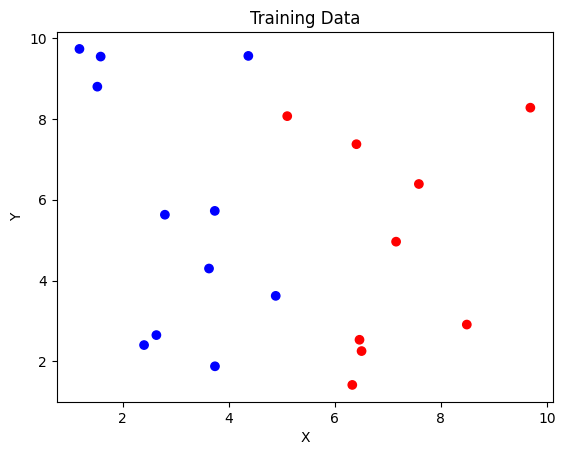

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 random points between 1 and 10
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))

# Assign classes based on some condition
y_train = np.array([0 if x[0] < 5 else 1 for x in X_train])

# Scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.show()


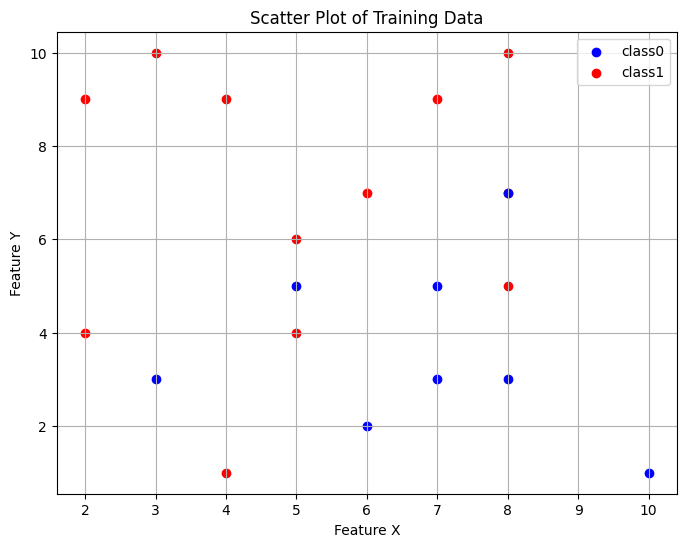

In [7]:
# A3
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate 20 random data points for features X and Y
X = np.random.randint(1, 11, size=20)
Y = np.random.randint(1, 11, size=20)

# Randomly assign points to one of two classes
classes = np.random.choice([0, 1], size=20)

# Prepare the plot
plt.figure(figsize=(8, 6))

# Create a dictionary to map class labels to colors
color_map = {0: 'blue', 1: 'red'}
labels_map = {0: 'class0', 1: 'class1'}
used_labels = set()

# Plot points, color by class
for x, y, cls in zip(X, Y, classes):
    label = labels_map[cls] if labels_map[cls] not in used_labels else ""
    plt.scatter(x, y, color=color_map[cls], label=label)
    used_labels.add(labels_map[cls])

# Add legends, labels and title
plt.legend()
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.grid(True)

# Show plot
plt.show()


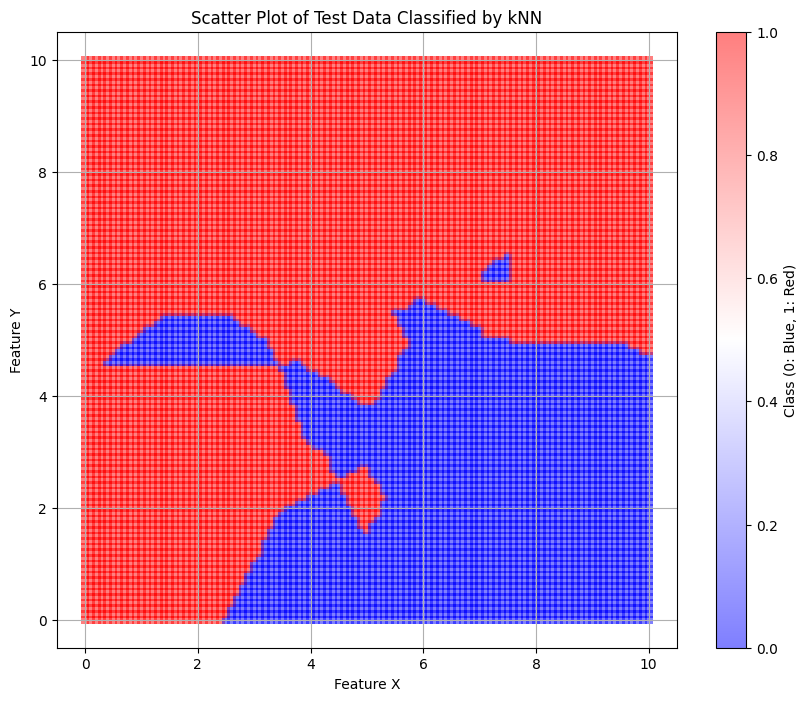

In [8]:
# A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.randint(1, 11, size=20)
Y_train = np.random.randint(1, 11, size=20)
classes = np.random.choice([0, 1], size=20)

# Combine X_train and Y_train into a single array for training
training_data = np.column_stack((X_train, Y_train))

# Create the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data, classes)

# Generate test data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Classify test data
test_predictions = knn.predict(test_data)

# Plot test data output
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.5, marker='s', edgecolor='none')
plt.colorbar(label='Class (0: Blue, 1: Red)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Test Data Classified by kNN')
plt.grid(True)
plt.show()


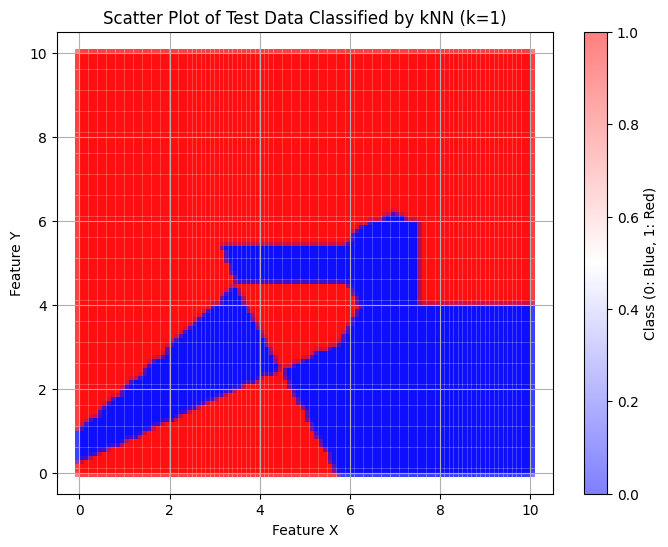

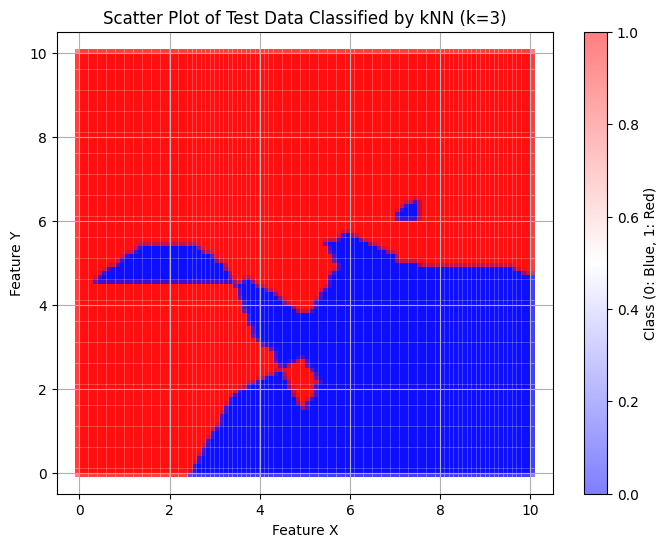

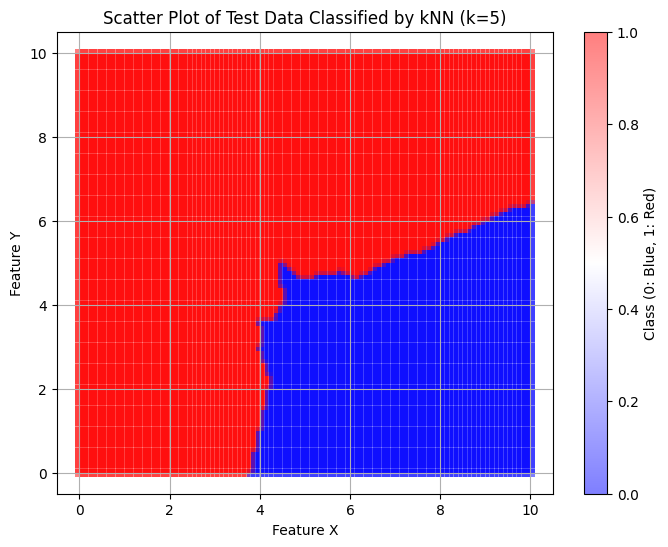

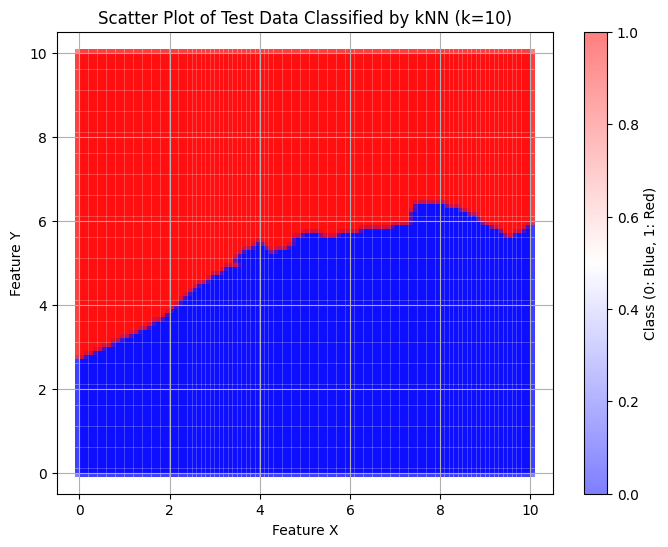

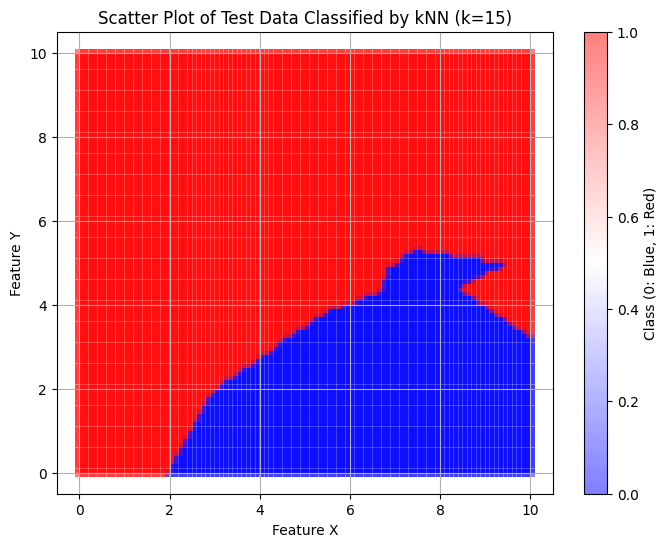

In [10]:
# A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.randint(1, 11, size=20)
Y_train = np.random.randint(1, 11, size=20)
classes = np.random.choice([0, 1], size=20)

# Combine X_train and Y_train into a single array for training
training_data = np.column_stack((X_train, Y_train))

# Generate test data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Values of k to test
k_values = [1, 3, 5, 10, 15]

for k in k_values:
    # Create the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, classes)

    # Classify test data
    test_predictions = knn.predict(test_data)

    # Plot test data output
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.5, marker='s', edgecolor='none')
    plt.colorbar(scatter, label='Class (0: Blue, 1: Red)')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Scatter Plot of Test Data Classified by kNN (k={k})')
    plt.grid(True)
    plt.show()


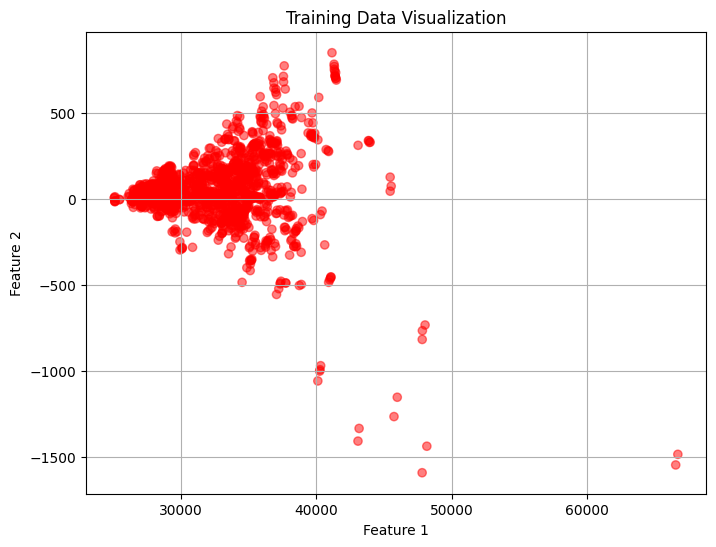

In [ ]:
# A6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('/content/DCT_withoutduplicate 2.csv')

# Select two features and assume the class is the last column
X = data.iloc[:, [0, 1]].values  # Update indices according to your dataset's relevant features
y = data.iloc[:, -1].values  # Assumes class labels are in the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the training data
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data Visualization')
plt.grid(True)
plt.show()

# Values of k to test
k_values = [1, 3, 5, 10, 15]

for k in k_values:
    # Create and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Create a mesh grid for the background colors
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class for each point in the mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results with decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='k', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'kNN Classifier Boundaries with k={k}')
    plt.grid(True)
    plt.show()

In [1]:
# A7
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('/content/DCT_withoutduplicate 2.csv')

# Select two features and assume the class is the last column
X = data.iloc[:, [0, 1]].values  # Change as needed based on your dataset's relevant features
y = data.iloc[:, -1].values  # Assumes class labels are in the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the kNN classifier
knn = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}  # Test k from 1 to 30

# Use grid search to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation

# Fit model to data
knn_gscv.fit(X_train, y_train)

# Check top performing n_neighbors value
best_k = knn_gscv.best_params_['n_neighbors']
best_score = knn_gscv.best_score_

# Use the best k to predict the test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Test set accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Best k: 1
Best cross-validation score: 0.3460
Test set accuracy: 0.3511
              precision    recall  f1-score   support

        3333       0.64      0.60      0.62        15
        3334       0.71      0.92      0.80        13
        3335       0.71      0.67      0.69        15
        3337       0.33      0.43      0.38         7
        3342       0.35      0.27      0.31        22
        3343       0.00      0.00      0.00         1
        3346       0.36      0.42      0.38        12
        3349       0.12      0.10      0.11        30
        3350       0.00      0.00      0.00         1
        3351       0.04      0.10      0.06        10
        3352       0.00      0.00      0.00        19
        3353       0.33      0.21      0.26        19
        3354       0.31      0.41      0.35        22
        3355       0.00      0.00      0.00         1
        3356       0.16      0.21      0.18        14
        3357       0.00      0.00      0.00         1
        3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
